# CSE 572: Homework 3

This notebook provides a template and starting code to implement the Homework 3 assignment.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

## Real or spurious clusters?

An important question in assessing cluster validity is whether we are finding real patterns in structured data or finding patterns in noise or random data.

In this homework, you are given a dataset from an unknown source with unknown attributes. You are asked to cluster the data into 3 clusters using K-means clustering. Your goal is to evaluate whether the clusters you find in the dataset are due to real structure in the data or just patterns in noise. You can use any method we have discussed in class or in the Data Mining textbook to solve this problem. Show all of your work and then answer the question in the final Question cell.

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)

data = pd.read_csv('https://docs.google.com/uc?export=download&id=1aALuGEy92Z_Lk3BqeKx09IwgVZn615Z6', header=None)
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
26,80.0,125.0,172.0,82.0,127.0,0.0,60.0,42.0,244.0,130.0,...,185.0,51.0,93.0,149.0,7.0,231.0,20.0,68.0,175.0,39.0
86,44.0,216.0,97.0,191.0,203.0,80.0,4.0,244.0,240.0,13.0,...,210.0,248.0,16.0,234.0,251.0,108.0,95.0,83.0,247.0,151.0
2,27.0,161.0,104.0,91.0,223.0,162.0,228.0,0.0,219.0,139.0,...,129.0,78.0,53.0,80.0,191.0,230.0,84.0,87.0,70.0,130.0
55,74.0,75.0,209.0,174.0,1.0,249.0,151.0,126.0,135.0,32.0,...,161.0,8.0,69.0,97.0,218.0,92.0,140.0,75.0,196.0,211.0
75,90.0,214.0,61.0,20.0,136.0,22.0,240.0,211.0,130.0,19.0,...,150.0,162.0,41.0,109.0,62.0,167.0,149.0,86.0,74.0,198.0
93,254.0,17.0,71.0,100.0,48.0,246.0,132.0,133.0,193.0,13.0,...,251.0,144.0,47.0,250.0,200.0,37.0,83.0,9.0,183.0,120.0
16,207.0,234.0,191.0,105.0,43.0,218.0,31.0,36.0,44.0,107.0,...,246.0,181.0,242.0,55.0,235.0,241.0,27.0,180.0,109.0,198.0
73,224.0,55.0,154.0,62.0,245.0,181.0,215.0,194.0,30.0,59.0,...,91.0,3.0,70.0,138.0,234.0,0.0,17.0,211.0,205.0,113.0
54,9.0,250.0,224.0,168.0,143.0,234.0,120.0,195.0,223.0,94.0,...,21.0,204.0,159.0,60.0,159.0,172.0,78.0,207.0,102.0,227.0
95,111.0,126.0,126.0,167.0,11.0,252.0,183.0,253.0,79.0,5.0,...,34.0,167.0,222.0,0.0,31.0,88.0,204.0,148.0,214.0,215.0


In [ ]:

print("There are ",data.shape[1]," features and ",data.shape[0]," samples in the given dataset")

There are  64  features and  100  samples in the given dataset


In [ ]:
n_clusters=3
from sklearn.cluster import KMeans
k_means_m = KMeans(n_clusters=n_clusters, init='k-means++',   random_state=0)
k_means_m.fit(data)
data["clusters"]=k_means_m.labels_
data.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,clusters
0,83.0,230.0,40.0,201.0,182.0,232.0,31.0,237.0,204.0,91.0,...,224.0,56.0,13.0,60.0,22.0,166.0,31.0,94.0,206.0,0
1,0.0,149.0,6.0,32.0,98.0,252.0,32.0,142.0,31.0,78.0,...,106.0,29.0,42.0,166.0,4.0,93.0,32.0,50.0,85.0,1
2,27.0,161.0,104.0,91.0,223.0,162.0,228.0,0.0,219.0,139.0,...,78.0,53.0,80.0,191.0,230.0,84.0,87.0,70.0,130.0,2
3,187.0,173.0,23.0,230.0,23.0,88.0,85.0,234.0,247.0,227.0,...,209.0,30.0,180.0,128.0,9.0,102.0,169.0,157.0,224.0,2
4,152.0,109.0,4.0,247.0,130.0,212.0,113.0,1.0,169.0,99.0,...,190.0,71.0,41.0,47.0,41.0,126.0,120.0,240.0,216.0,2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


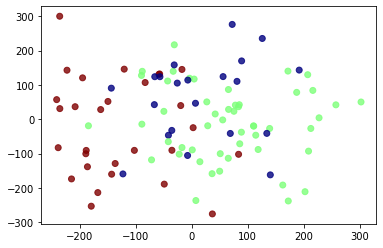

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_components = 2
scaler = StandardScaler()
pca = PCA(n_components=n_components).fit(data)
df=pca.transform(data)
df=pd.DataFrame(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1], alpha=0.8, c=data['clusters'], cmap='jet')

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,clusters
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,130.020000,138.900000,123.830000,121.27000,130.570000,144.940000,130.720000,128.090000,126.900000,119.940000,...,142.190000,112.840000,121.450000,126.650000,136.670000,119.020000,127.730000,126.060000,131.510000,1.080000
std,72.851028,70.073627,71.871526,73.96257,77.144788,74.222137,76.064709,72.535898,77.044065,67.762482,...,76.146681,69.190955,76.042568,74.423898,72.626908,71.865894,69.959708,70.750068,69.651585,0.706106
min,0.000000,14.000000,0.000000,1.00000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,8.000000,1.000000,2.000000,9.000000,0.000000
25%,73.750000,82.750000,59.000000,54.50000,58.750000,85.000000,67.500000,63.250000,50.750000,68.500000,...,81.000000,61.500000,53.000000,60.000000,77.750000,57.750000,76.500000,70.750000,72.750000,1.000000
50%,142.000000,135.500000,132.500000,112.00000,136.500000,160.500000,124.500000,126.500000,124.500000,111.500000,...,147.000000,96.500000,110.500000,132.000000,146.000000,106.500000,121.000000,125.000000,122.500000,1.000000
75%,185.250000,198.500000,173.500000,190.25000,197.250000,207.000000,209.000000,186.500000,190.000000,177.500000,...,212.750000,171.750000,194.250000,191.000000,204.250000,177.750000,178.500000,187.000000,198.000000,2.000000
max,254.000000,251.000000,253.000000,254.00000,252.000000,253.000000,254.000000,253.000000,253.000000,253.000000,...,250.000000,251.000000,254.000000,251.000000,249.000000,251.000000,252.000000,252.000000,248.000000,2.000000


In [ ]:
arr=[] #stores min and max values
arr2=[] #stores mean and std of values
for i in range(64):
  arr.append([min(data.iloc[:,i]),max(data.iloc[:,i])])
  arr2.append([np.mean(data.iloc[:,i]),np.std(data.iloc[:,i])])
  

In [ ]:
print("min and max values of each attributes are",arr)
print("----------------------------------------------")
print("mean and std of each attributes are",arr2)

min and max values of each attributes are [[0.0, 254.0], [14.0, 251.0], [0.0, 253.0], [1.0, 254.0], [0.0, 252.0], [0.0, 253.0], [4.0, 254.0], [0.0, 253.0], [1.0, 253.0], [1.0, 253.0], [1.0, 247.0], [0.0, 247.0], [8.0, 253.0], [3.0, 252.0], [3.0, 254.0], [0.0, 254.0], [7.0, 254.0], [1.0, 254.0], [2.0, 250.0], [2.0, 252.0], [0.0, 253.0], [1.0, 252.0], [3.0, 254.0], [1.0, 253.0], [2.0, 247.0], [0.0, 254.0], [1.0, 254.0], [0.0, 245.0], [0.0, 254.0], [4.0, 251.0], [2.0, 253.0], [2.0, 251.0], [1.0, 254.0], [3.0, 252.0], [1.0, 254.0], [3.0, 252.0], [0.0, 252.0], [0.0, 250.0], [1.0, 250.0], [2.0, 254.0], [1.0, 250.0], [0.0, 254.0], [3.0, 252.0], [3.0, 252.0], [0.0, 254.0], [3.0, 253.0], [0.0, 253.0], [0.0, 252.0], [7.0, 254.0], [0.0, 253.0], [0.0, 250.0], [6.0, 249.0], [4.0, 254.0], [0.0, 254.0], [1.0, 254.0], [0.0, 250.0], [0.0, 251.0], [0.0, 254.0], [2.0, 251.0], [0.0, 249.0], [8.0, 251.0], [1.0, 252.0], [2.0, 252.0], [9.0, 248.0]]
----------------------------------------------
mean and std 

In [ ]:
import random
def create_data():
    data=[]
    for i in range(64):
      temp=[]
      for j in range(100):
        temp.append(random.randint(arr[i][0],arr[i][1]))
      data.append(temp)
    return data


In [ ]:
sse=[]
for i in range(500):
  data=create_data()
  k_means = KMeans(n_clusters=n_clusters, init='k-means++',   random_state=0)
  k_means.fit(data)
  
  sse.append(k_means.inertia_)

In [ ]:
print("sum of squared errors for each randmonly created dataset are",sse)

sum of squared errors for each randmonly created dataset are [31309506.240722775, 31135308.0, 30854252.463975154, 31060934.00942761, 31607265.00592105, 30793495.566315793, 30906623.966071427, 31290742.109395113, 31148791.54288499, 30942919.80874951, 31363010.63142857, 31108746.885454547, 31189791.96153846, 31074686.86437247, 31641229.158310793, 31308455.565347187, 31572504.935606062, 30775974.745710783, 30723802.707885303, 30824831.09211377, 31240999.919047624, 31319060.59154334, 30973799.79411765, 31345337.470940173, 31206303.663636364, 31185214.02922078, 31200256.539136622, 30842213.932234436, 31557222.70689655, 31740591.096866094, 31120903.85333333, 31090516.715358716, 31156332.35909091, 30448933.854166664, 31431325.65619047, 30824092.99989599, 31251098.6982647, 31005010.64088022, 30836857.80316742, 31498973.849206343, 30830796.638947368, 30863598.461904757, 30601779.341642223, 31849332.364035085, 31099437.50427808, 31205945.209790207, 30883881.517612018, 31445636.76623931, 31324914

### Visualization of distributions of the SSE

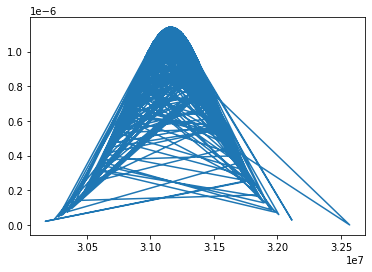

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
mean = statistics.mean(sse)
sd = statistics.stdev(sse)
  
plt.plot(sse, norm.pdf(sse, mean, sd))


(array([  8.,  24.,  86., 110., 131.,  92.,  41.,   6.,   1.,   1.]),
 array([30172387.67      , 30411995.99390909, 30651604.31781818,
        30891212.64172727, 31130820.96563637, 31370429.28954545,
        31610037.61345454, 31849645.93736364, 32089254.26127272,
        32328862.58518182, 32568470.90909091]),
 <a list of 10 Patch objects>)

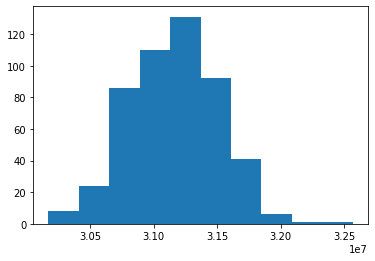

In [ ]:
plt.hist(sse)

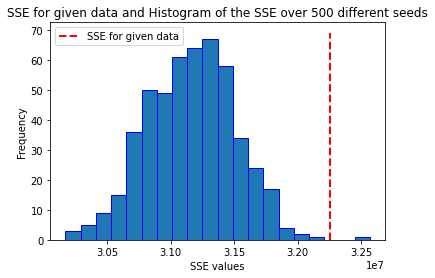

In [ ]:
plt.hist(x=sse, bins=20,edgecolor='blue')
plt.plot([k_means_m.inertia_]*70,list(range(0,70)),color='red',linestyle='dashed',linewidth=2,label='SSE for given data')
plt.xlabel("SSE values")
plt.ylabel("Frequency")
plt.legend()
plt.title("SSE for given data and Histogram of the SSE over 500 different seeds")
plt.show()

In [ ]:
pd.DataFrame(sse).describe()

,0
count,5.000000e+02
mean,3.116115e+07
std,3.499174e+05
min,3.017239e+07
25%,3.090983e+07
50%,3.116217e+07
75%,3.140070e+07
max,3.256847e+07


In [ ]:
print("the sse score of the given dataset is",k_means_m.inertia_)
print("the mean of sse of the randomly generated data is",np.mean(sse))

the sse score of the given dataset is 32251803.5392775
the mean of sse of the randomly generated data is 31161147.276443742


**Question: Does your clustering represent real or spurious patterns in the data? Explain your answer.**

**Answer:**

The clustering appers to be spurious pattern.

As we can see in the plot with sse values of randomly genrated data and sse for given data, the sse lies in the last percentile of the randomly genrated data indicating that given data is randomly generated, as the mean of SSE os randomly generated data is 31171966.320128527 if the given data is real the sse of that data should be way less than mean but in this case  its not indicating that given data is spurious
